Training accuracy: 0.6784140969162996
Testing accuracy: 0.6973684210526315


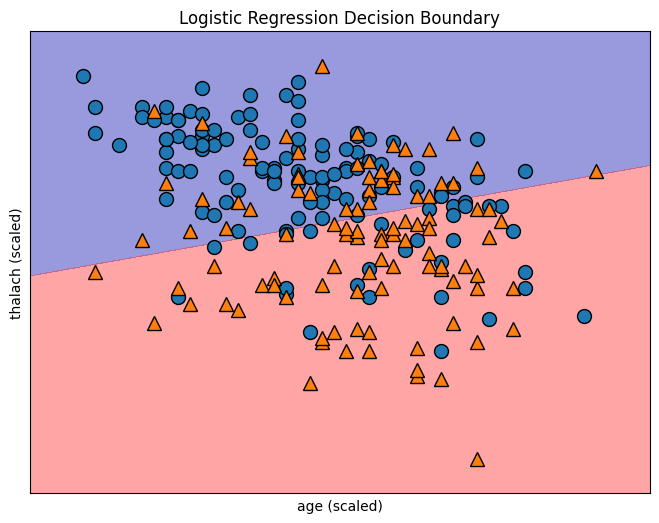

In [24]:
!pip install mglearn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/drive/MyDrive/machine learning/week 1/HeartDisease.csv")

df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

features = ['age', 'thalach']
X = df[features].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print("Training accuracy:", model.score(X_train_scaled, y_train))
print("Testing accuracy:", model.score(X_test_scaled, y_test))

plt.figure(figsize=(8, 6))
mglearn.plots.plot_2d_separator(model, X_train_scaled, fill=True, alpha=0.4)
mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], y_train)
plt.xlabel("age (scaled)")
plt.ylabel("thalach (scaled)")
plt.title("Logistic Regression Decision Boundary")
plt.grid(True)
plt.show()


Training accuracy: 0.6784140969162996
Testing accuracy: 0.6973684210526315
Accuracy: 0.6973684210526315
Precision: 0.6764705882352942
Recall: 0.6571428571428571
F1 Score: 0.6666666666666666
AUC: 0.7609756097560977


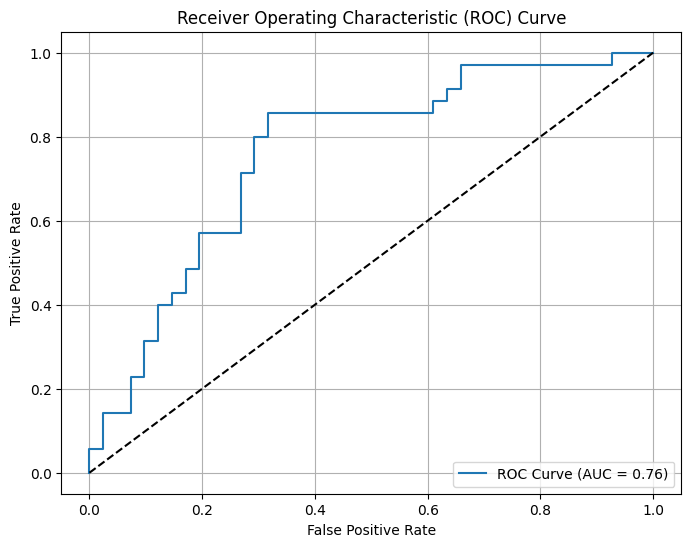

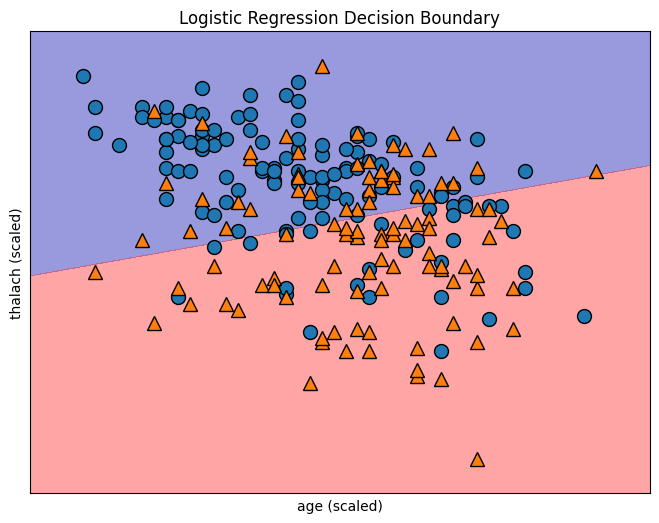

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
!pip install mglearn --quiet



df = pd.read_csv("/content/drive/MyDrive/machine learning/week 1/HeartDisease.csv")

df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

features = ['age', 'thalach']
X = df[features].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("Training accuracy:", model.score(X_train_scaled, y_train))
print("Testing accuracy:", model.score(X_test_scaled, y_test))

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc}")


# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
mglearn.plots.plot_2d_separator(model, X_train_scaled, fill=True, alpha=0.4)
mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], y_train)
plt.xlabel("age (scaled)")
plt.ylabel("thalach (scaled)")
plt.title("Logistic Regression Decision Boundary")
plt.grid(True)
plt.show()


Logistic Regression Function Logistic regression menggunakan fungsi sigmoid:
𝜎 ( 𝑧 ) = 1 1 + 𝑒 − 𝑧 , 𝑧 = 𝑤 0 + 𝑤 1 𝑥 1 + 𝑤 2 𝑥 2 + ⋯ + 𝑤 𝑛 𝑥 𝑛 σ(z)= 1+e −z

1​,z=w 0​+w 1​x 1​+w 2​x 2​+⋯+w n​x n​

𝜎 ( 𝑧 ) σ(z) adalah probabilitas bahwa data termasuk kelas 1.

𝑤 w adalah bobot yang dipelajari model.

𝑥 x adalah fitur input.

Akurasi Accuracy = 𝑇 𝑃
+ 𝑇 𝑁 𝑇 𝑃 + 𝑇 𝑁 + 𝐹 𝑃 + 𝐹 𝑁 Accuracy= TP+TN+FP+FN TP+TN​

TP: True Positive

TN: True Negative

FP: False Positive

FN: False Negative

Presisi Precision = 𝑇 𝑃 𝑇 𝑃
+ 𝐹 𝑃 Precision= TP+FP TP​

Presisi mengukur berapa banyak dari prediksi positif yang benar-benar positif.

Recall (Sensitivity) Recall = 𝑇 𝑃 𝑇 𝑃
+ 𝐹 𝑁 Recall= TP+FN TP​

Recall mengukur seberapa banyak dari total positif yang berhasil dikenali.

F1-Score 𝐹 1 = 2 ⋅ Precision ⋅ Recall Precision
+ Recall F1=2⋅ Precision+Recall Precision⋅Recall​

Rata-rata harmonik dari precision dan recall — seimbang di antara keduanya.

ROC dan AUC ROC Curve: grafik antara TPR (True Positive Rate) dan FPR (False Positive Rate).
AUC (Area Under Curve): area di bawah ROC curve, nilainya antara 0.5–1.0 (semakin tinggi semakin baik).